<a href="https://colab.research.google.com/github/khunsang/gwcourse_data/blob/main/Pycbc_waveforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. PyCBC Tutorial: Generating Waveforms

We will be using the [PyCBC](http://github.com/ligo-cbc/pycbc) library, which is used to study gravitational-wave data, find astrophysical sources due to compact binary mergers, and study their parameters. These are some of the same tools that the LIGO and Virgo collaborations use to find gravitational waves in LIGO/Virgo data 

In this tutorial we will walk through  how to generate the waveform of a gravitational-wave merger. 

Additional [examples](http://pycbc.org/pycbc/latest/html/#library-examples-and-interactive-tutorials) and module level documentation are [here](http://pycbc.org/pycbc/latest/html/py-modindex.html)

**Getting the software environment setup**

PyCBC is installable through pip. It relies on portions of the [LALSuite]() c-library. A bundled version of this suitable for use with PyCBC is also available on Mac / Linux through pip. **It is recommended** to use [conda](https://docs.ligo.org/lscsoft/conda/) on your own machine, as explained in the [installation instructions](https://github.com/gw-odw/odw-2019/blob/master/setup.md). These softwares can be installed as follows within the notebook

In [2]:
import sys
!{sys.executable} -m pip install pycbc ligo-common --no-cache-dir

     |████████████████████████████████| 6.3MB 18.6MB/s 
     |████████████████████████████████| 890kB 20.7MB/s 
     |████████████████████████████████| 1.6MB 38.1MB/s 
     |████████████████████████████████| 61kB 43.1MB/s 
     |████████████████████████████████| 27.3MB 1.4MB/s 
     |████████████████████████████████| 81kB 47.8MB/s 
     |████████████████████████████████| 61kB 45.1MB/s 
     |████████████████████████████████| 3.2MB 42.3MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.2-cp37-none-any.whl size=200617 sha256=b58fb35e43693dbf105f5ddf582a029c9dcd16814b8fc48443f3ef31d8921b95
  Stored in directory: /tmp/pip-ephem-wheel-cache-_4hxtgb1/wheels/21/73/06/ea4b85609301850b1289a282852d92e22fcbf7a250ed5f547f
  Created wheel for lscsoft-glue: filename=lscsoft_glue-2.0.0-cp37-cp37m-linux_x86_64.whl size=416788 sha256=d9a369b05fb9df80d27fae03aba86f8911a08f27435bb63a57296ae43a957820
  Stored in directory: /tmp/pip-ephem-wheel-cache-_4hxtgb1/wheels/aa/fa/38/d61b002c627ca54f03755b9a288f4b

### Generate your first waveform !

Here we'll generate the gravitational waveform using one of the available waveform approximants. These can be generated as a time series using [`get_td_waveform`](http://pycbc.org/pycbc/latest/html/pycbc.waveform.html#pycbc.waveform.waveform.get_td_waveform). There are some additional examples using this interface [here](http://pycbc.org/pycbc/latest/html/waveform.html). The key parameters are the masses of the binary (given in solar masses), the time between samples (in seconds), the starting gravitational-wave frequency (Hz) and the name of the approximant we'd like to generate.  

In this excercise, we  have choosen to use `TaylorT4` waveform. This waveform model generates only inspiral part of GW signal.


In [6]:
from pycbc.waveform import td_approximants
import numpy as np
print (td_approximants())

['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TEOBResumS', 'IMRPhenomT', 'IMRPhenomTHM', 'TaylorF2', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv2_ROM_EffectiveSpin', 'SEOBNRv2_ROM_DoubleSpin', 'EOBNRv2_RO

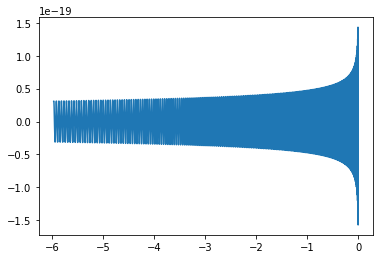

In [5]:
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab

# The output of this function are the "plus" and "cross" polarizations of the gravitational-wave signal 
# as viewed from the line of sight at a given source inclination (assumed face-on if not provided)


#sampling frequency of strain data
fs = 4096.0

## Lower cut-off frequency
f_low = 20

hp, hc = get_td_waveform(approximant="TaylorT4",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/fs,
                         f_lower=f_low)

pylab.plot(hp.sample_times, hp, label='Plus Polarization')

For simplicity, we will use only one polarisation in matched filtering the data.  You can use either `hp` or `hc`

In [8]:
h_plus_array = np.array(hp)
h_cross_array = np.array(hc)